In [1]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [2]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

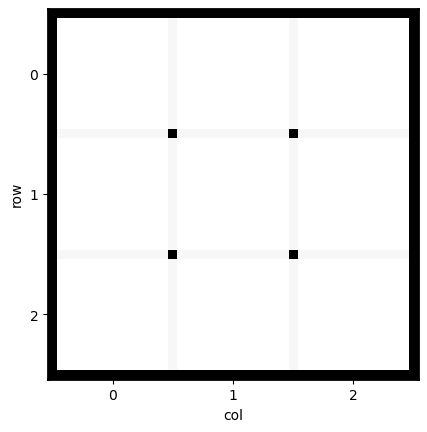

In [3]:
dataset.show_maze(0)

In [4]:
n_agents = 1
vision = 3
n_episodes =10000
update_factor = 10000
len_game = 500
lr = 1e-3
train = trainer.Maze_Training('test',dataset,len_game,n_agents,action_type='cardinal',
                              vision=vision,n_episodes = n_episodes,lr = lr,update_factor=update_factor)
train.train(lambda_entropy=0.5)
train.save()

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


episode 542 with loss 3.8763797283172607
episode 607 with loss 12.612305641174316
episode 664 with loss 7.752649784088135
episode 707 with loss 16.317426681518555
episode 736 with loss 12.21816635131836
episode 756 with loss 4.7908148765563965
episode 775 with loss 11.351677894592285
episode 801 with loss 12.50635814666748
episode 810 with loss 2.2261712551116943
episode 828 with loss 14.5435209274292
episode 848 with loss 7.4618940353393555
episode 864 with loss 4.098760604858398
episode 866 with loss 13.474519729614258
episode 878 with loss 4.990450382232666
episode 882 with loss 5.547819137573242
episode 895 with loss 1.9715653657913208
episode 902 with loss 3.923051357269287
episode 908 with loss 6.434807300567627
episode 911 with loss 1.9595756530761719
episode 913 with loss 2.491006374359131
episode 915 with loss 4.904568195343018
episode 919 with loss 3.756086587905884
episode 922 with loss 4.958527088165283
episode 933 with loss 2.0400819778442383
episode 943 with loss 3.947232

KeyboardInterrupt: 

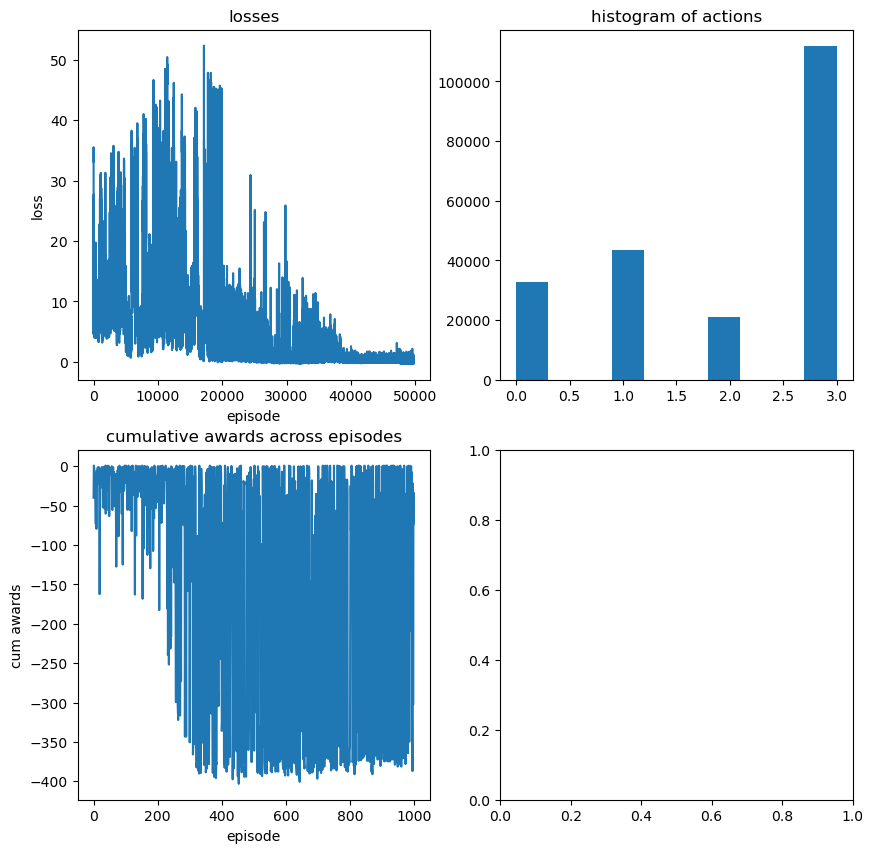

In [ ]:
train.results()

In [ ]:
train.agents.run_agent(dataset.__getitem__(0),num_agents=1,len_game=50,epsilon=0,sample_prob=False)


In [ ]:
import DQN.agent as agent

load = agent.CNN_Maze_Agents(3)
load.load('version_1')

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/agent.py:257: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.Q_fun.load_state_dict(torch.load(os.path.join(fd,

RuntimeError: Error(s) in loading state_dict for CNN_Q_fun:
	Missing key(s) in state_dict: "CNN_function.0.weight", "CNN_function.0.bias", "CNN_function.2.weight", "CNN_function.2.bias", "CNN_function.5.weight", "CNN_function.5.bias", "global_function.0.weight", "global_function.0.bias", "global_function.2.weight", "global_function.2.bias", "final_function.0.weight", "final_function.0.bias", "final_function.2.weight", "final_function.2.bias", "final_function.4.weight", "final_function.4.bias". 
	Unexpected key(s) in state_dict: "Q_function.0.weight", "Q_function.0.bias", "Q_function.0.running_mean", "Q_function.0.running_var", "Q_function.0.num_batches_tracked", "Q_function.1.weight", "Q_function.1.bias", "Q_function.3.weight", "Q_function.3.bias", "Q_function.6.weight", "Q_function.6.bias", "Q_function.8.weight", "Q_function.8.bias", "Q_function.10.weight", "Q_function.10.bias". 

In [7]:
load.run_agent(dataset.__getitem__(0),len_game=20)

cumulative reward: [-676]
